In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns            

In [49]:
df = pd.read_csv(r"C:\Users\prajw\Downloads\Iris.csv")

In [50]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [51]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [52]:
df.tail() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [53]:
len(df) 

150

In [54]:
df.shape 

(150, 6)

In [55]:
df.columns 

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [56]:
for i, col in enumerate(df.columns):
    print(f'Column number {1+i} is {col}')

Column number 1 is Id
Column number 2 is SepalLengthCm
Column number 3 is SepalWidthCm
Column number 4 is PetalLengthCm
Column number 5 is PetalWidthCm
Column number 6 is Species


In [57]:
df.dtypes 

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [58]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [59]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [60]:
df.isnull().sum() 

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [61]:
df.drop('Id', axis = 1, inplace = True) 

In [62]:
df.head() 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [63]:
df.isnull().sum() 

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [64]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [65]:
# Target Data
target_data = df.iloc[:, 4]
target_data.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [66]:
# Training Data
clustering_data = df.iloc[:,[0,1,2,3]]
clustering_data.head() 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


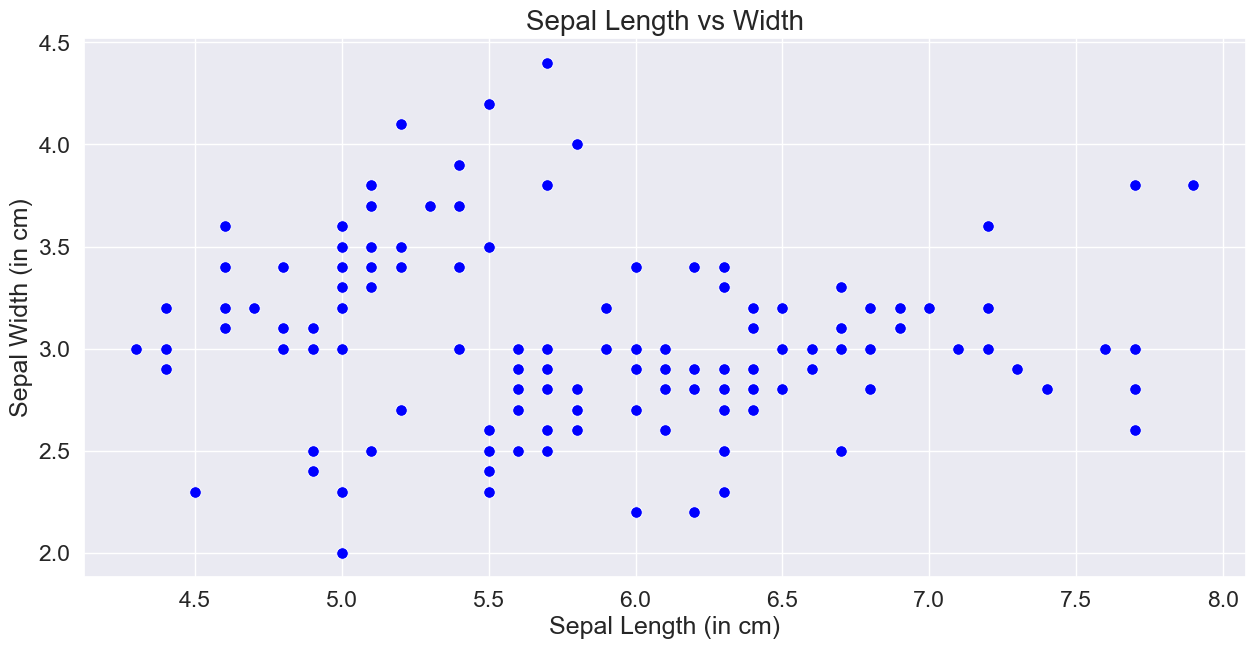

In [67]:
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)

# Scatterplot
ax = sns.scatterplot(x=df['SepalLengthCm'], y=df['SepalWidthCm'], s=70, color='blue')

# Labels
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')

# Title
plt.title('Sepal Length vs Width', fontsize=20)
plt.show()


In [68]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [69]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from sklearn.cluster import KMeans
import numpy as np

wcss = []  # 'wess' ko 'wcss' se replace kiya
for i in range(1, 11):
    km = KMeans(i)  # indentation fix
    km.fit(clustering_data)
    wcss.append(km.inertia_)

np.array(wcss)

array([680.8244    , 152.36870648,  78.94084143,  57.34540932,
        49.71325421,  38.93873974,  38.03076056,  33.19683955,
        28.90479477,  26.56252769])

In [70]:
fig, ax = plt.subplots(figsize = (15, 7))
ax = plt.plot(range(1, 11), wcss, linewidth = 2, color = "red", marker = "8")
plt.axvline(x = 3, 1s = '--")
plt.ylabel('WCSS")
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show() 

SyntaxError: invalid decimal literal (3950748958.py, line 3)

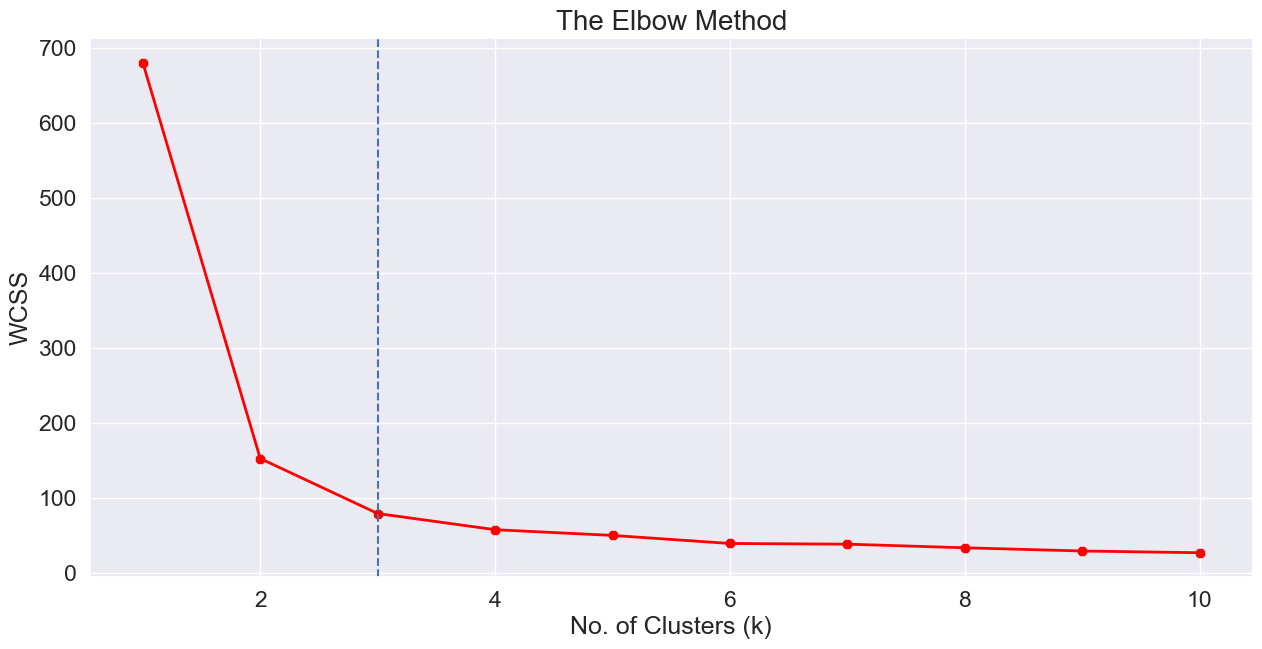

In [71]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 7))

# Line plot
ax = plt.plot(range(1, 11), wcss, linewidth=2, color='red', marker='8')

# Vertical line at k=3
plt.axvline(x=3, ls='--')

# Labels and title
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize=20)

plt.show()

In [72]:
# Clusters. 

In [73]:
kms = KMeans(n_clusters = 3, init = 'k-means++')
kms.fit(clustering_data)
KMeans(n_clusters = 3)
clusters = clustering_data.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(clustering_data)
clusters.head() 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster_Prediction
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,2


In [74]:
kms.cluster_centers_ 

array([[4.725     , 2.8125    , 1.875     , 0.40625   ],
       [6.31458333, 2.89583333, 4.97395833, 1.703125  ],
       [5.12368421, 3.55526316, 1.48157895, 0.25789474]])

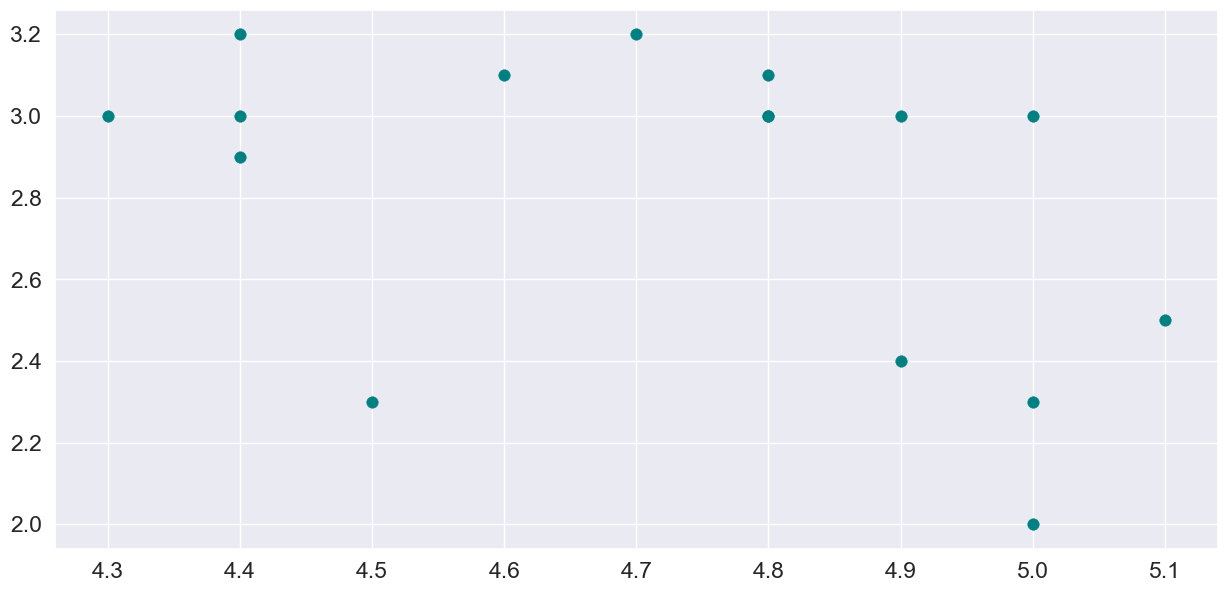

In [75]:
fig, ax = plt.subplots(figsize=(15,7))

plt.scatter(
    x=clusters[clusters['Cluster_Prediction'] == 0]['SepalLengthCm'],
    y=clusters[clusters['Cluster_Prediction'] == 0]['SepalWidthCm'],
    s=70,
    edgecolor='teal',
    linewidth=0.3,
    c='teal',
    label='Iris-versicolor'
) 

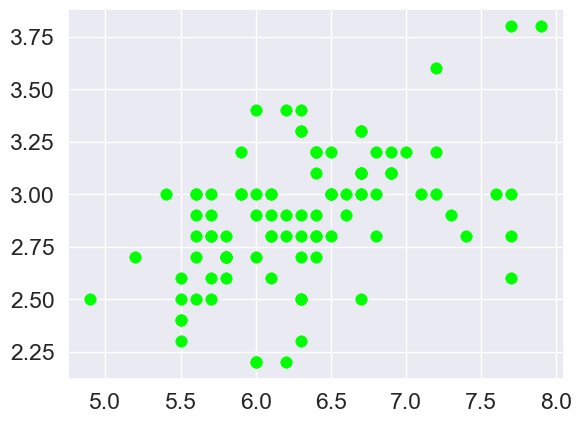

In [76]:
plt.scatter(
    x=clusters[clusters['Cluster_Prediction'] == 1]['SepalLengthCm'],
    y=clusters[clusters['Cluster_Prediction'] == 1]['SepalWidthCm'],
    s=70,
    edgecolor='lime',
    linewidth=0.3,
    c='lime',
    label='Iris-setosa'
)


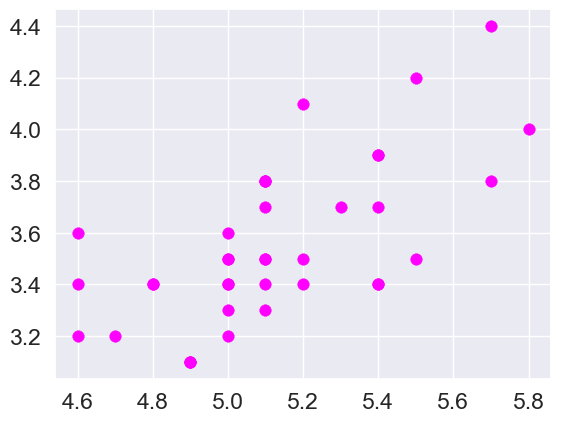

In [77]:
plt.scatter(
    x=clusters[clusters['Cluster_Prediction'] == 2]['SepalLengthCm'],
    y=clusters[clusters['Cluster_Prediction'] == 2]['SepalWidthCm'],
    s=70,
    edgecolor='magenta',
    linewidth=0.3,
    c='magenta',
    label='Iris-virginica'
)


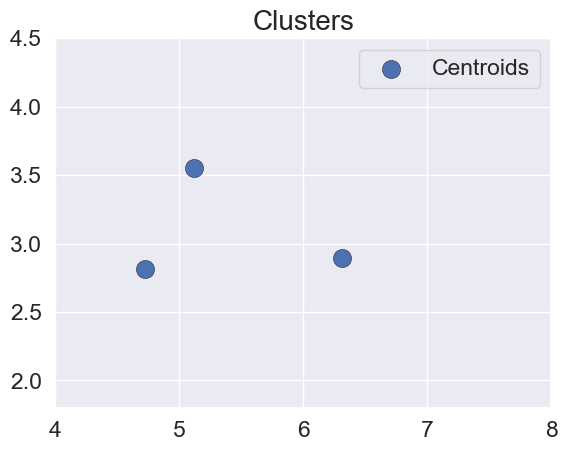

In [78]:
plt.scatter(
    x=kms.cluster_centers_[:, 0],
    y=kms.cluster_centers_[:, 1],
    s=170,
    label='Centroids',
    edgecolor='black',
    linewidth=0.3
)

plt.legend(loc='upper right')
plt.xlim(4, 8)
plt.ylim(1.8, 4.5)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Clusters', fontsize=20)
plt.show()
